In [1]:
import numpy as np
import math
import matplotlib.pylab as plt

In [2]:
u=np.ones(3)
v=np.ones(3)
u1=np.ones(3)
v1=np.ones(3)
g=np.ones(3)
g1=np.ones(3)
e=0
b=0
theta=0
d=1

Функция, пересчитывающая скорости после столкновения

In [3]:
def col (u,v,e,b):
    g=u-v
    theta=2*np.arccos(b/d)
    g2=np.sqrt(g[0]**2+g[1]**2)
    g1[0]=g[0]*np.cos(theta)-g[0]*g[2]*np.cos(e)*np.sin(theta)/g2+g[0]*g[1]*np.sin(e)*np.sin(theta)/g2
    g1[1]=g[1]*np.cos(theta)-g[1]*g[2]*np.cos(e)*np.sin(theta)/g2+g[0]*g[1]*np.sin(e)*np.sin(theta)/g2
    g1[2]=g[2]*np.cos(theta)+g2*np.cos(e)*np.sin(theta)
    u1=u*0.5+v*0.5+g1*0.5
    v1=(u+v)*0.5-g1*0.5
    return u1, v1

In [4]:
def countr(i,j,k):
    E1=v[0][i]**2+v[1][j]**2+v[2][k]**2+v[0][k1]**2+v[1][k2]**2+v[2][k3]**2
    E2=v[0][i-k1+j1]**2+v[1][j-k2+j2]**2+v[2][k-k3+j3]**2+v[0][j1]**2+v[1][j2]**2+v[2][j3]**2
    r=(E0-E1)/(E2-E1)
    return (r)

In [5]:
def dist(v,i,j,k):
    f[i][j][k]=4*math.pi*(np.sqrt(1/(2*math.pi)))**3*np.exp(-((v[0][i]-3)**2+(v[1][j]-3)**2+(v[2][k]-3)**2)/(2))+4*math.pi*(np.sqrt(1/(2*math.pi)))**3*np.exp(-((v[0][i]+3)**2+(v[1][j]+3)**2+(v[2][k]+3)**2)/(2))
    return f

Проверка

In [6]:
vtest=np.random.randn(3)
utest=np.random.randn(3)
u1,v1=col(vtest,utest,0,0)
def test(u1, v1):
    if (np.round(utest+vtest,6) == np.round(u1+v1,6)).all() and round(utest[0]**2+utest[1]**2+utest[2]**2+vtest[0]**2+vtest[1]**2+vtest[2]**2,6) == round(u1[0]**2+u1[1]**2+u1[2]**2+v1[0]**2+v1[1]**2+v1[2]**2,6):
        return ("Correct")
    else:
        return ("Incorrect")
test(u1,v1)

'Correct'

Сетка

In [8]:
k=1
T=1
m=1
v0=np.sqrt(k*T/m)
delta=v0/2
vcut=10*v0
M=vcut/delta
v=[[(0.5+k)*delta for k in range(int(-M-1),int(M+1))] for j in range(3)]
f=np.zeros((int(2*M)+2,int(2*M)+2,int(2*M)+2))
C=16*math.pi*vcut**3/(delta)**3
for i in range(0,int(2*M)+1):
    for j in range(0,int(2*M)+1):
        for k in range(0,int(2*M)+1):
            np.append(f,dist(v,i,j,k))

Генерация скоростей (индексов из сетки)

In [9]:
b=np.random.rand()
e=np.random.uniform(0,2*math.pi)
i1=np.random.randint(int(-M-1),int(M+1))
i2=np.random.randint(int(-M-1),int(M+1))
i3=np.random.randint(int(-M-1),int(M+1))
j1=np.random.randint(int(-M-1),int(M+1))  
j2=np.random.randint(int(-M-1),int(M+1))
j3=np.random.randint(int(-M-1),int(M+1))

In [15]:
r

0.532608695652174

In [44]:
for o in range(100000):
    b=np.random.rand()
    e=np.random.uniform(0,2*math.pi)
    i1=np.random.randint(int(-M-1),int(M+1))
    i2=np.random.randint(int(-M-1),int(M+1))
    i3=np.random.randint(int(-M-1),int(M+1))
    j1=np.random.randint(int(-M-1),int(M+1))  
    j2=np.random.randint(int(-M-1),int(M+1))
    j3=np.random.randint(int(-M-1),int(M+1))
    u1,v1=col(np.array([v[0][i1],v[1][i2],v[2][i3]]),np.array([v[0][j1],v[1][j2],v[2][j3]]),e,b)
    if abs(u1[0])<10 and abs(u1[1])<10 and abs(u1[2])<10 and abs(v1[0])<10 and abs(v1[1])<10 and abs(v1[2])<10:
        k1=int(round((u1[0]+10.25)/delta))
        k2=int(round((u1[1]+10.25)/delta))
        k3=int(round((u1[2]+10.25)/delta))
        l1=int(round((v1[0]+10.25)/delta))
        l2=int(round((v1[1]+10.25)/delta))
        l3=int(round((v1[2]+10.25)/delta))
        u2=np.ones(3)
        v2=np.ones(3)
        u2[0]=v[0][int(k1)]
        u2[1]=v[1][int(k2)]
        u2[2]=v[2][int(k3)]
        v2[0]=v[0][int(l1)]
        v2[1]=v[1][int(l2)]
        v2[2]=v[2][int(l3)]
        E0=v[0][i1]**2+v[1][i2]**2+v[2][i3]**2+v[0][j1]**2+v[1][j2]**2+v[2][j3]**2
        q=np.ones(3)
        for i in range(k1-1,k1+2):
            for j in range(k2-1,k2+2):
                for k in range(k3-1,k3+2):
                    r = countr(i,j,k)
                    if r<1 and r>0:
                        q[0]=i
                        q[1]=j
                        q[2]=k
                        break
                    else:
                        continue
        if q[0] != 1 or q[1] != 1 or q[2] != 1:
            #fa=f[int(i1+M)][int(i2+M)][int(i3+M)]
            #fb=f[int(j1+M)][int(j2+M)][int(j3+M)]
            #flam=f[k1][k2][k3]
            #fmu=f[l1][l2][l3]
            #fmu1=f[int(q[0])][int(q[1])][int(q[2])]
            #flam1=f[int(q[0]-k1+j1)][int(q[1]-k2+j2)][int(q[2]-k3+j3)]
            deltat=0.1
            B=0
            B=B+C*((f[k1][k2][k3]*f[l1][l2][l3])**(1-r)*(f[int(q[0])][int(q[1])][int(q[2])]*f[int(q[0]-k1+j1)][int(q[1]-k2+j2)][int(q[2]-k3+j3)])**r-f[int(i1+M)][int(i2+M)][int(i3+M)]*f[int(j1+M)][int(j2+M)][int(j3+M)])
            f[int(i1+M)][int(i2+M)][int(i3+M)]=f[int(i1+M)][int(i2+M)][int(i3+M)]-B*deltat
            f[int(j1+M)][int(j2+M)][int(j3+M)]=f[int(j1+M)][int(j2+M)][int(j3+M)]-B*deltat
            f[k1][k2][k3]=f[k1][k2][k3]+r*B*deltat
            f[l1][l2][l3]=f[l1][l2][l3]+r*B*deltat
            f[int(q[0])][int(q[1])][int(q[2])]=f[int(q[0])][int(q[1])][int(q[2])]+(1-r)*B*deltat
            f[int(q[0]-k1+j1)][int(q[1]-k2+j2)][int(q[2]-k3+j3)]=f[int(q[0]-k1+j1)][int(q[1]-k2+j2)][int(q[2]-k3+j3)]+(1-r)*B*deltat

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipyk

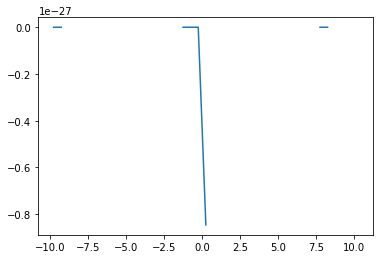

In [65]:
fig=plt.figure()
plt.plot(v[0],f[1][40])
plt.show()

In [78]:
u1,v1=col(np.array([v[0][i1],v[1][i2],v[2][i3]]),np.array([v[0][j1],v[1][j2],v[2][j3]]),e,b)

interpolation

In [79]:
k1=int(round((u1[0]+10.25)/delta))
k2=int(round((u1[1]+10.25)/delta))
k3=int(round((u1[2]+10.25)/delta))
l1=int(round((v1[0]+10.25)/delta))
l2=int(round((v1[1]+10.25)/delta))
l3=int(round((v1[2]+10.25)/delta))

In [80]:
u2=np.ones(3)
v2=np.ones(3)
u2[0]=v[0][int(k1)]
u2[1]=v[1][int(k2)]
u2[2]=v[2][int(k3)]
v2[0]=v[0][int(l1)]
v2[1]=v[1][int(l2)]
v2[2]=v[2][int(l3)]

In [81]:
E0=v[0][i1]**2+v[1][i2]**2+v[2][i3]**2+v[0][j1]**2+v[1][j2]**2+v[2][j3]**2

In [82]:
def countr(i,j,k):
    E1=v[0][i]**2+v[1][j]**2+v[2][k]**2+v[0][k1]**2+v[1][k2]**2+v[2][k3]**2
    E2=v[0][i-k1+j1]**2+v[1][j-k2+j2]**2+v[2][k-k3+j3]**2+v[0][j1]**2+v[1][j2]**2+v[2][j3]**2
    r=(E0-E1)/(E2-E1)
    return (r)

In [85]:
q[0]-k1+j1

-4.0

In [66]:
f

array([[[            nan,  1.51553228e-33,             nan, ...,
                     nan,             nan,             nan],
        [ 1.51553228e-33,  5.01875364e-32,             nan, ...,
                     nan,             nan,  0.00000000e+00],
        [ 3.90860926e-32,  1.29435362e-30,  3.33818199e-29, ...,
          2.63127515e-53,  5.07955599e-56,             nan],
        ...,
        [            nan,  1.02025609e-54,             nan, ...,
          6.52227900e-56,  2.52896202e-57,             nan],
        [            nan,  1.96955760e-57,  5.07955599e-56, ...,
                     nan,  9.80584988e-59,             nan],
        [ 0.00000000e+00,  0.00000000e+00,             nan, ...,
                     nan,  0.00000000e+00,  0.00000000e+00]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [-2.72394911e-04,             nan,  4.28631052e-29, ...,
                     nan,  6.52227900e

In [83]:
q=np.ones(3)
for i in range(k1-1,k1+2):
    for j in range(k2-1,k2+2):
        for k in range(k3-1,k3+2):
            r = countr(i,j,k)
            if r<1 and r>0:
                q[0]=i
                q[1]=j
                q[2]=k
                break
            else:
                continue

Рассчитаем интеграл столкновений

In [257]:
C=16*math.pi*vcut**3/(delta)**3

Задание функции распределения

In [258]:
def dist(v,i,j,k):
    f[i][j][k]=4*math.pi*(v[0][i]**2+v[1][j]**2+v[2][k]**2)*(np.sqrt(1/(2*math.pi)))**3*np.exp(-(v[0][i]**2+v[1][j]**2+v[2][k]**2)/(0.5))+4*math.pi*((v[0][i]**2+v[1][j]**2+v[2][k]**2)*20)*(np.sqrt(1/(2*math.pi)))**3*np.exp(-(v[0][i]**2+v[1][j]**2+v[2][k]**2)*20/(0.5))
    return f

In [396]:
def disttest(v):
    f=4*math.pi*(np.sqrt(1/(2*math.pi)))**3*np.exp(-(v-2)**2)+4*math.pi*(np.sqrt(1/(2*math.pi)))**3*np.exp(-(v+2)**2)
    return f

In [397]:
p=np.arange(-10,10,0.1)

<function matplotlib.pyplot.show(*args, **kw)>

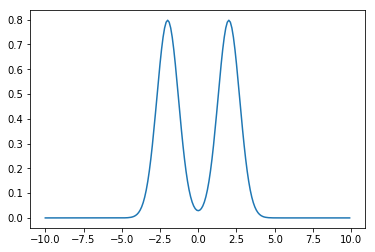

In [398]:
fig=plt.figure()
plt.plot(p,disttest(p))
plt.show

In [263]:
f=np.zeros((int(2*M)+1,int(2*M)+1,int(2*M)+1))
for i in range(0,int(2*M)+1):
    for j in range(0,int(2*M)+1):
        for k in range(0,int(2*M)+1):
            np.append(f,dist(v,i,j,k))

Массив, в котором каждому значению сетки соответствует значение функции распределения

In [448]:
f

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [98]:
q = [3,1,1]
if q[0] != 1 or q[1] != 1 or q[2] != 1:
    print (0)

0


In [297]:
fa=f[int(i1+M)][int(i2+M)][int(i3+M)]
fb=f[int(j1+M)][int(j2+M)][int(j3+M)]
flam=f[k1][k2][k3]
fmu=f[l1][l2][l3]
flam=f[k1][k2][k3]
fmu1=f[int(q[0])][int(q[1])][int(q[2])]
flam1=f[int(q[0]-k1+j1)][int(q[1]-k1+j1)][int(q[2]-k1+j1)]

In [300]:
deltat=0.1
fa=fa-C*deltat
fb=fb-C*deltat
flam=flam+r*C*deltat
fmu=fmu+r*C*deltat
flam1=flam1+(1-r)*C*deltat
fmu1=fmu1+(1-r)*C*deltat

In [302]:
I=0
#for i in range(2M+1):
I=I+C*((flam*fmu)**(1-r)*(flam1*fmu1)**r-fa*fb)

In [303]:
I

-491680178919746.4

In [273]:
j3

17

In [149]:
5*math.pi*(v[0][0]**2+v[1][0]**2+v[2][0]**2)*(np.sqrt(1/(2*math.pi)))**3*np.exp((v[0][0]**2+v[1][0]**2+v[2][0]**2)/(0.5))

4.815496488900996e+139

In [150]:
v[0][0]

-10.25

In [152]:
np.exp(v[0][0]**2+v[1][0]**2+v[2][0]**2)

7.659351754410023e+136

In [240]:
v[0][41]

10.25

In [233]:
M

20.0

In [362]:
abs(-10)

10

In [395]:
f[0][0][0]

4.5765109300871077e-35

In [390]:
f

array([[[4.57651093e-35, 1.51553228e-33, 3.90860926e-32, ...,
         1.24292637e-53, 3.08090645e-56, 5.94754860e-59],
        [1.51553228e-33, 5.01875364e-32, 1.29435362e-30, ...,
         4.11600685e-52, 1.02025609e-54, 1.96955760e-57],
        [3.90860926e-32, 1.29435362e-30, 3.33818199e-29, ...,
         1.06153216e-50, 2.63127515e-53, 5.07955599e-56],
        ...,
        [1.24292637e-53, 4.11600685e-52, 1.06153216e-50, ...,
         2.63127515e-53, 1.31003476e-54, 5.07955599e-56],
        [3.08090645e-56, 1.02025609e-54, 2.63127515e-53, ...,
         1.31003476e-54, 6.52227900e-56, 2.52896202e-57],
        [5.94754860e-59, 1.96955760e-57, 5.07955599e-56, ...,
         5.07955599e-56, 2.52896202e-57, 9.80584988e-59]],

       [[1.51553228e-33, 5.01875364e-32, 1.29435362e-30, ...,
         4.11600685e-52, 1.02025609e-54, 1.96955760e-57],
        [5.01875364e-32, 1.66198295e-30, 4.28631052e-29, ...,
         1.36303427e-50, 3.37862417e-53, 6.52227900e-56],
        [1.29435362e-30, 

In [435]:
a=np.array(v)
a.shape

(3, 42)